# Plotting with Matplotlib
Use Matplotlib to create bar charts that visualize the conclusions you made with groupby and query.

In [1]:
# Import necessary packages and load `winequality_edited.csv`
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
% matplotlib inline

df = pd.read_csv('winequality_edited.csv')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,RED,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,RED,med-high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,RED,med-low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,RED,med-high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,RED,low


### #1: Do wines with higher alcoholic content receive better ratings?
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples. This first one is filled out for you.

In [2]:
# Use query to select each group and get its mean quality
median = df['alcohol'].median()
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

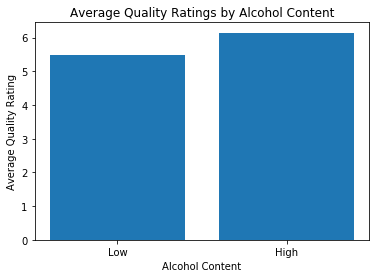

In [3]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### #2: Do sweeter wines receive higher ratings?
Create a bar chart with one bar for low residual sugar and one bar for high residual sugar wine samples.

In [4]:
# Use query to select each group and get its mean quality
sugar_median = df['residual_sugar'].median()
sugar_low = df.query('residual_sugar < {}'.format(sugar_median))
sugar_high = df.query('residual_sugar >= {}'.format(sugar_median))

sugar_mean_quality_low = sugar_low['quality'].mean()
sugar_mean_quality_high = sugar_high['quality'].mean()

print('sugar low quality mean: {}'.format(sugar_mean_quality_low))
print('sugar high quality mean: {}'.format(sugar_mean_quality_high))

sugar low quality mean: 5.808800743724822
sugar high quality mean: 5.82782874617737


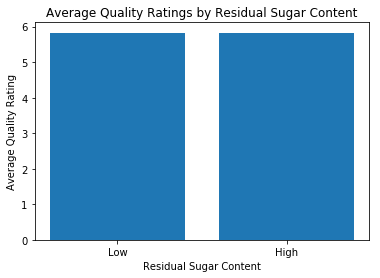

In [5]:
# Create a bar chart with proper labels

#locations = [1, 2]
sugar_heights = [sugar_mean_quality_low, sugar_mean_quality_high]
#labels = ['Low', 'High']
plt.bar(locations, sugar_heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual Sugar Content')
plt.xlabel('Residual Sugar Content')
plt.ylabel('Average Quality Rating');

### #3: What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

In [6]:
# Use groupby to get the mean quality for each acidity level

quality_acid_level_means = df.groupby(['acidity_levels'])['quality'].mean()
print(quality_acid_level_means)


acidity_levels
high        5.783343
low         5.859415
med-high    5.784540
med-low     5.850832
Name: quality, dtype: float64


Text(0,0.5,'Quality')

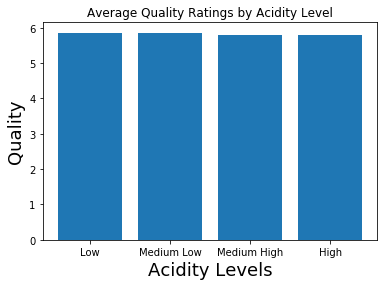

In [7]:
# Create a bar chart with proper labels

# stop hardcoding the locations, we can generate them once we know how many means we
# will plot (i.e. the number of acidity levels we grouped by)
x_coords = list(np.arange(1, len(quality_acid_level_means) + 1))

# reindex because the default order wasn't human-readable friendly
quality_acid_level_means = quality_acid_level_means.reindex(['low', 'med-low', 'med-high', 'high'])
#print(quality_acid_level_means)

# labels are in same order of reindex
acidity_labels = ['Low', 'Medium Low', 'Medium High', 'High']

plt.bar(x_coords, quality_acid_level_means, tick_label=acidity_labels)

plt.title('Average Quality Ratings by Acidity Level')

plt.xlabel('Acidity Levels', fontsize=18)
plt.ylabel('Quality', fontsize=18)



### Bonus: Create a line plot for the data in #3
You can use pyplot's [plot](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) function for this.

In [13]:
# this shows the order from the re-index
quality_acid_level_means

acidity_levels
low         5.859415
med-low     5.850832
med-high    5.784540
high        5.783343
Name: quality, dtype: float64

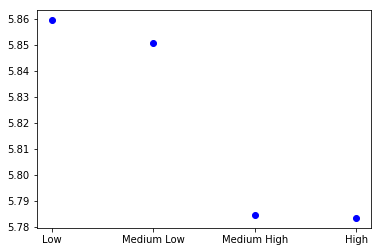

In [17]:
# need to use xticks to get the labels
plt.plot(x_coords, quality_acid_level_means, 'bo')
plt.xticks(x_coords, acidity_labels);

Compare this with the bar chart. How might showing this visual instead of the bar chart affect someone's conclusion about this data?